***

## 4.0 Reddit Classification Report

- [4.1 Problem Statement](#4.1-Problem-Statement)
- [4.2 My Model](#4.2-My-Model)
- [4.3 Conclusion and Recommendations](#4.3-Conclusion-and-Recommendations)




<!-- - Back to: [4.0 Reddit Classification Report](#4.0-Reddit-Classification-Report) -->

Jump to:
- [1.0 Data Collection and Cleaning](01_data_collection_&_cleaning.ipynb)
- [2.0 EDA & Data Preprocessing](02_eda_&_data_processing.ipynb)
- [3.0 Model Building](03_model_building.ipynb)
<!-- - [4.0 Reddit Classification Report](04_reddit_classification_report.ipynb) -->

## 4.1 Problem Statement


Since its founding in 1990, IMDB.com has been the No.1 internet movie database which is written solely by contributors in the internet community. IMDB provides the sources for movie, TV and celebrity content and is designed to help fans explore the world of movies, show and films and also help them to decide what to watch.

As a contributor in this ever growing communty, there is a huge variety of data to be added and vetted on a daily basis. As movie profits and budgets grow, the amount of movies being produced and released per year has been steadily growing.

With daily submissions on the rise, much of the data on the website is still being handled by humans. As with art, new genres and subgenres emerges all the time and can be hard to keep track of. Many errors stem from incorrect genres and has lead to IMDB's customers not being able to find or link up with the appropriate content.

To improve, IMDB is looking to invest in a classifier to help auto-populate content such as the genre of a movie in the submission entries to keep its database relevant and clean. As an exploratory study into whether IMDB should invest in this upgrade, a team of Data Engineers are tasked to see if it is possible to accurately identify a movie genre based on the movie plot.

The goal of study is to find a classifier that would be to accurately predict whether a movie belongs to Sci-fi or Horror solely from key words taken from the plot entries associated to the genres. 


Success: A Binary Classification Model with a high ROC_AUC score.




***

## 4.2 My Model


#### <u>Baseline</u>

I have chosen the <b>baseline: 0.7211</b> as this is a binary classification problem, the simplest possible prediction would be for all post to belong to the majority of horror and my predictions would be correct 72.11% of the time. 

As this is a natural language processing task, only the target values have been transformed into binary objects, the remaining text data were used to to fit and transform our model. As all text remained in english, it will help us understand and interpret the results easily. 

----
#### <u>Data</u>

The data for this project was drawn from <b>/r/scifimovies</b> and <b>/r/HorrorMovies</b>, two movie subreddit groups who discuss and share plots, reviews and searches for the genre titles.

An intial view shows the imbalance of the classes with 892 post coming from /r/HorrorMovies and 345 post coming from /r/scifimovies. For my project, I will be allocating a negative case with the majority of examples and a positive case with a minority of examples ( 1 - Sci-fi, 0 - Horror ).
 
Both these groups are moderately active with fewer than 10 new posts a day, there are also no advertisments within the groups. Although a portion of the post do contain media, they mostly come along with descriptive titles or selftexts, which will suffice for the data we need. 

It is also good to point out that /r/scifimovies had a more curated feel with much more concise plots, therefore will be expected to have more meaningful and distinguished tokens. 

Using Reddit's API to retrieve data from two movie subreddit groups, it is cleaned in order to fit and train the final classifier model to be able to accurately predict the movie genres from posts.

----
#### <u>Normalizing</u>

As a part of preprocessing, I normalised the data by putting them through a <b>movie_cleaner</b> function which strips them off punctuations, emojis, links etc. the process also includes putting them through the Stemming method to get reduce the number of classes of words.

----

#### <u>Normalizing: Lemming and Stemming</u>

During text preprocessing I had explored lemmatization and stemming and found that they both had their successes. While both produced a similar list of words, the process of lemmatization produced words that made sense and had more context (i.e unbroken words). However, it also has its downfall where words of the same root were not being grouped together as hoped and we see examples of words like 'watch' and 'watched' appear in the top 20 list.  

Both methods also brought about a different score to the models. Therefore, I decided to go with <b>Stemming</b> which produced slightly better results. 

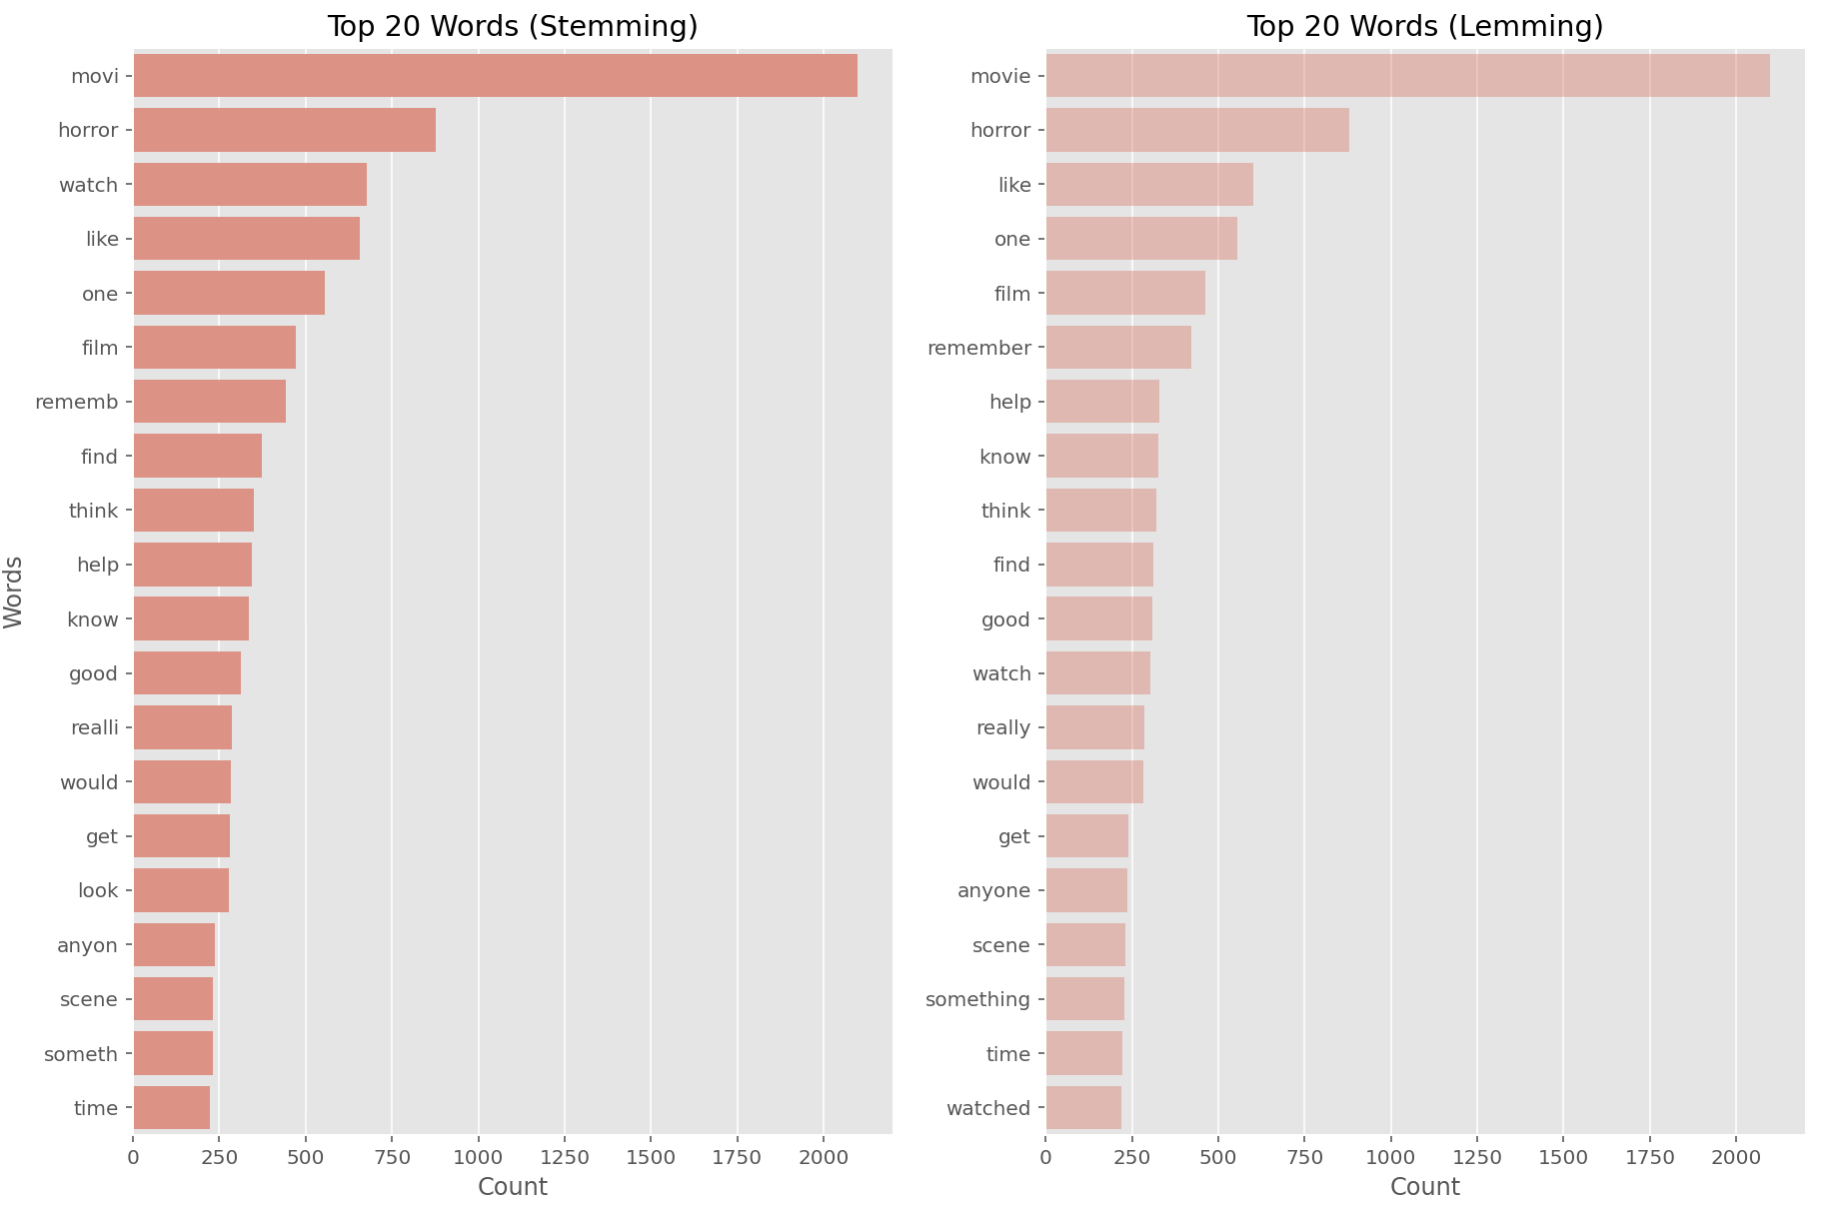

#### Lemming word results:
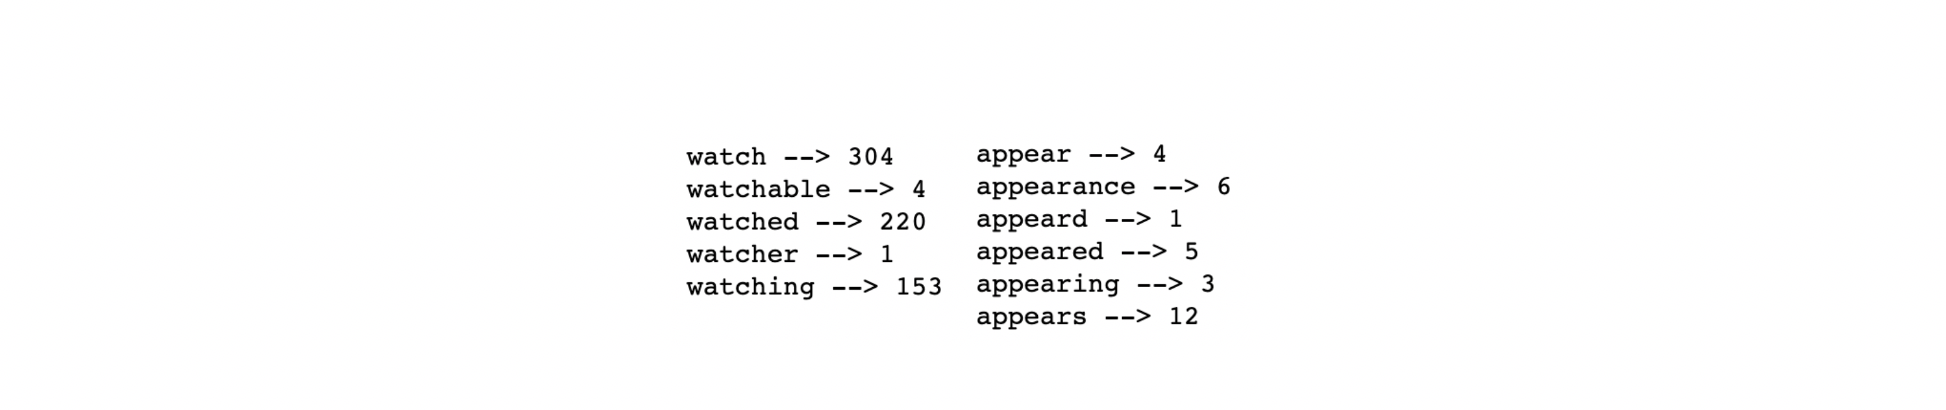


Because lemming uses vocabulary and morphological analysis of words, it aims to only remove inflectional endings. While this presents us with proper words, we now face an issue of having to spend more time sorting out these words. Essentially, the same words appearing twice in the list also will not make sense and dilutes the results we actually need. 

#### Stemming word results:
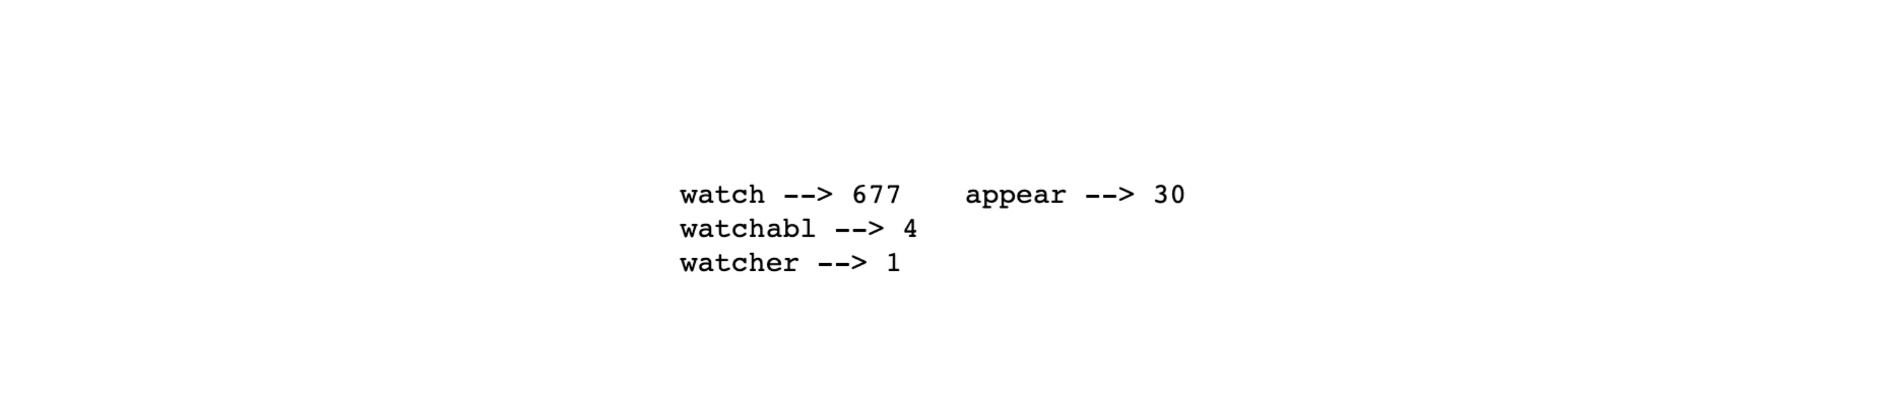


While Stemming helps reduce the same class of words down to a minimal and reduces the size of the index, it also helps keep the features short and meaningful and should optimize the classification process. It does come with a shortfall of not having proper words and having to make inference from the incomplete words. 

-----

#### <u>Stop Words</u>

The first run of the test models returned excellent test scores of 0.98 range, this was because main identifiers were still in the bag of words that was being used to fit the model. These words include key words of each post such as 'horror' or 'scifi' which easily gave the post away. 

Instead, I wanted to focus on how well the machine learning would do when obvious give-aways were removed, and challenge the model to succeed without these words. Surely in the wild, these words will still exist in the posts from contributors, but we know that they will only help to improve the scorings as the scorings dropped to the .80 range after these key-words were removed. 

Using the stopword function within vectorizers, I filtered a <b>second round of stop words</b> to my texts. This additional stopword list compromises of customised words which were taken from previous processes (top 20) and also words which were added into the bag during each run (behind the scenes) to remove unwanted words which remained in both subreddits with no meanings. 

Going through the posts on the subreddits, we find a good number of these chats belonging to people asking if anyone knew a title of the movie described, or whether anyone had any good movies to offer. Many of these posts included words like "title", "thought", "netflix", "good", "like", "best, etc. As many of these words were neutral and had no context with referencr to genre in both subreddits, I have added them to my stop word list, effectively curating the features which are fed into my classifiers. 

During the reruns, I have found that taking out noise have indeed <b>improved the scores of the models</b>. 

The words which remained in the bag reflected clearly the difference in quality of post in the two subreddits, where words coming from the Sci-fi bag were very distinct words linking to the world of Science Fiction, and the Horror bag contain pretty ambigious words. 

In the Sci-fi bag we see words like , "alien", "earth", "space", "planet", "robot". <br>
In the Horror bag we see words like "guy", "girl", "kill", "scari"(scary), "house".



-----

#### <u>Vectorizing</u>

I was faced with using either the CountVectorizer of the TF-IDF Vectoriser and decided to run both through along with my two options of classification models (totally 4 variations) to get my final model. Both Vectorizers split the documents into a matrix with each column representing a token. While the Count Vectorizer simply does it job and uses the token frequency as weight, I was really expecting the TF-IDF Vectorizer to have a bigger impact. 

TF-IDF stands for “term frequency-inverse document frequency”, the weights are assigned not only by frequency but by its recurrency throughout the  corpra. 


Surprisingly, the Model with <b>Count Vectorizer</b> performed better and was therefore chosen for the final model. 

#### Cvec WordClouds
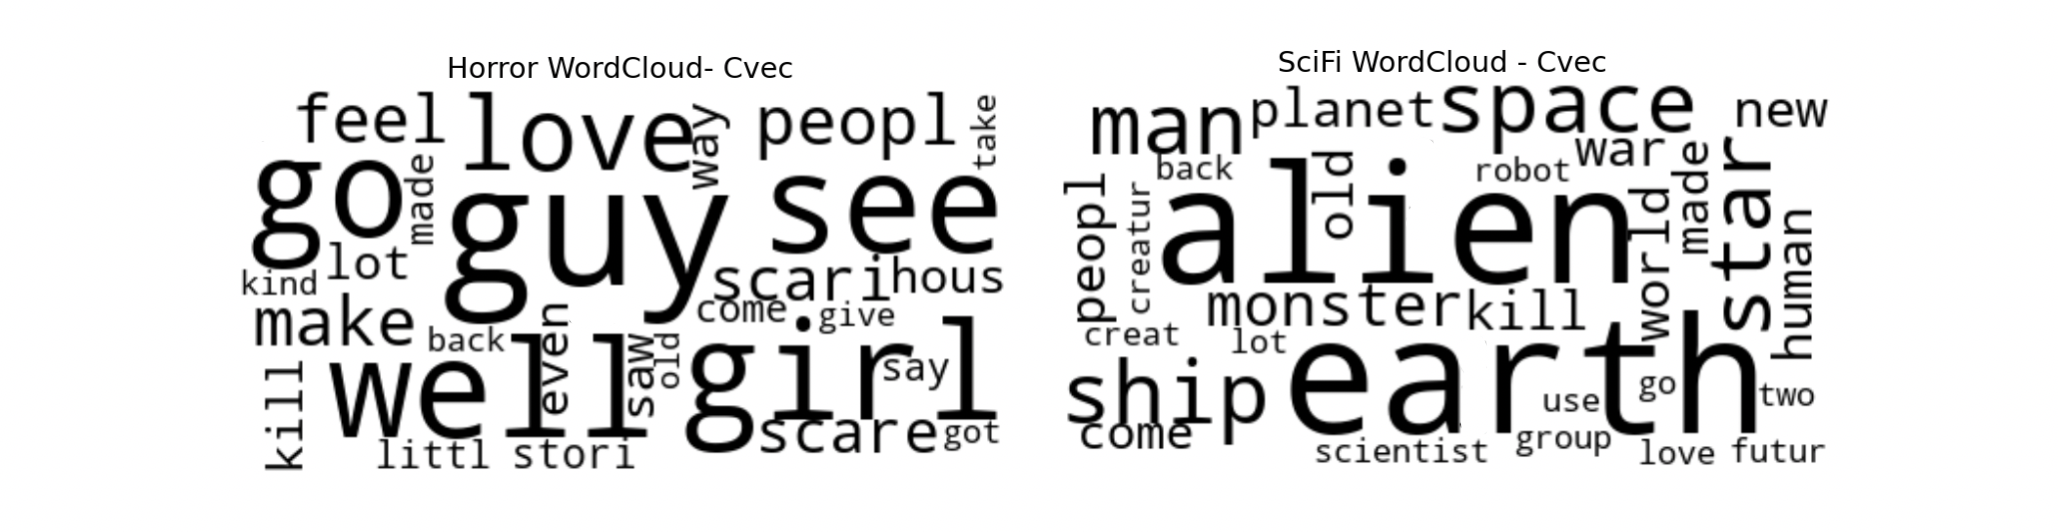


-----

#### <u>Model Selection</u>

I have chosen two models to test. There are a few considerations when making the model selections due to the fact that our collection of subreddit post was <b>imblanced</b> with us trying to predict the minority. 


#### Methods for dealing with unbalanced data:
1. Small data size (relative to features): Logistic Regression, Naïve Bayes
2. Columns of X will be all integer counts: Multinomial NB
3. Imbalanced data: Stratified CV
4. Purposefully optimising evaluation metrics: Precision-Recall Metrics, Sensivity-Specificity Metrics, ROC AUC


After considering the shorfalls of my data, I have picked Logistic Regression and the Multinomial NB models to test. both of which will be tested with both Vectorizing methods to give a total of four test models. 

A <b>successful model</b> will be the one with the <b>highest ROC_AUC score</b>, our final model is the <b>Multinomial NB with CountVectorizer</b>.

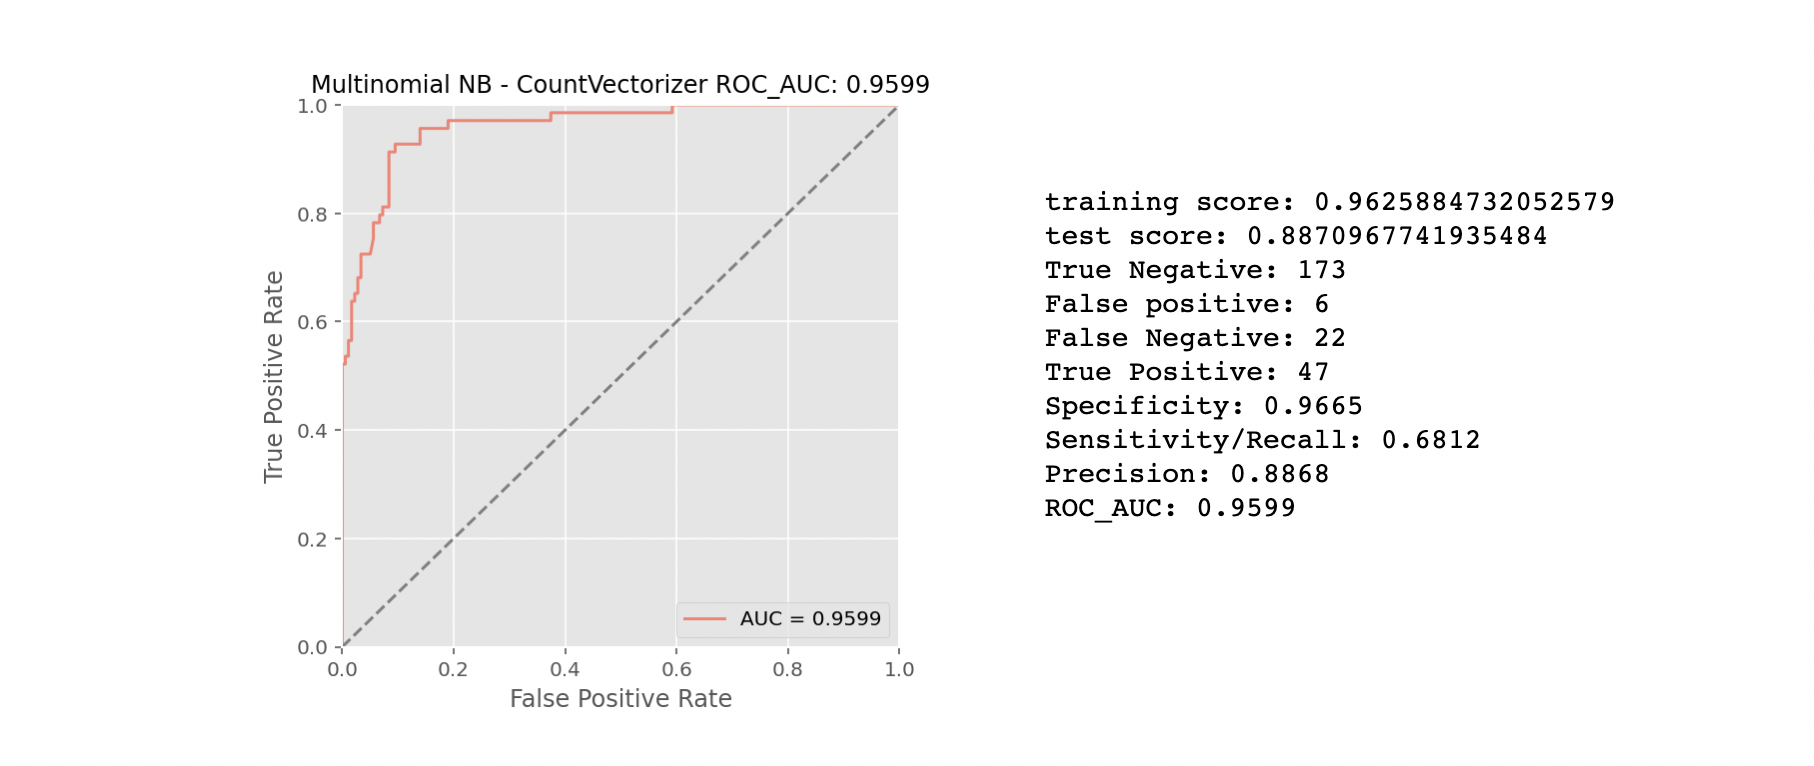



#### Model assumptions:
Naïve Bayes assumes all the features to be conditionally independent. The prediction might be poor if features are actually dependent.


#### Approach to improve model results:
When the training data size is small relative to the number of features, the data on prior probabilities help in improving the results. However, we do not have this information.


#### Model limitations:
Naïve Bayes works well even with less training data, as the estimates are based on the joint density function.


#### My results:
I approached optimization by running the model through GridSearchCV, <b>optimizing on alpha and setting scoring to roc_auc</b>. 

<b>This gave me a best score of 0.9472, with alpha=0.4642 and a final ROC_AUC score of 0.9577 </b>

If we compare this final score with the ROC_AUC score of 0.9599 in the intial model, you will notice that the final ROC_AUC score is slightly lower. However, the optimized model has manage to <b>minimise overfitting</b> by scoring better than its best score of 0.9472 



-----

#### <u>So what does this say?</u>


#### ROC_AUC

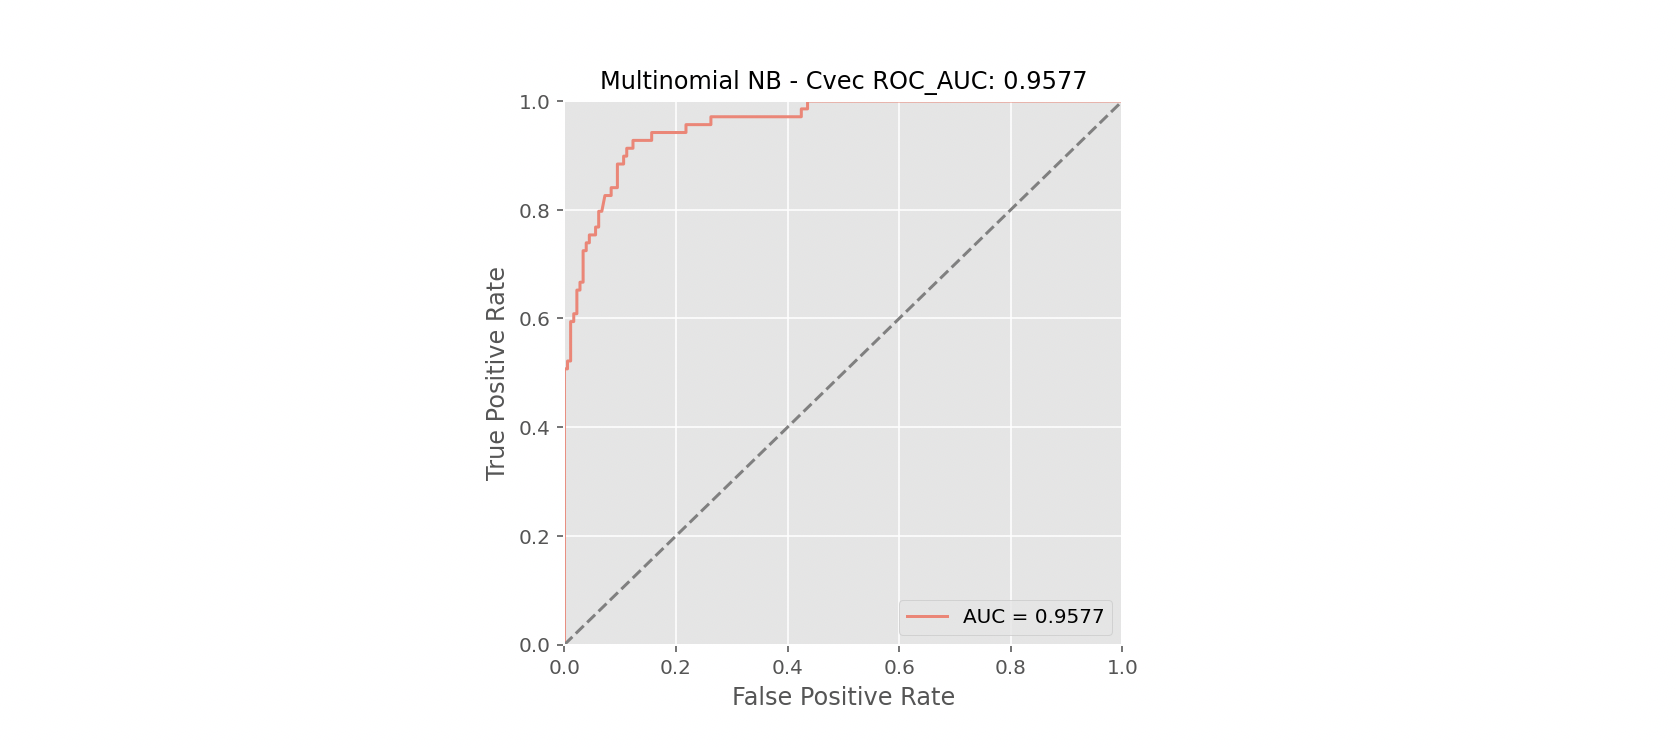

The curves are used to understand the trade-off in performance for different threshold values when interpreting probabilistic predictions. Each plot can also be summarized with an area under the curve (AUC) score that can be used to directly compare classification models.

The Receiver Operating Characteristic (ROC) Curve can be used to summerize the performance of a binary classification model on the positive class. The x-axis indicates the False Positive  Rate (FPR) and the y-axis indicates the True Positive Rate (TPR). The ROC curve does not bais to the majority or minority class and is therefore an ideal classifier for our model.

Ideally we will want the fraction of TPR to be at the top of the plot (indicating 1) and the fraction of FPR to be at the left of the plot (indidcating 0) with the perfect score being (coordinate 0,1 - at the top left corner). 

By evaluating the tradeoff between Sensitivity (TPR) and Specificity(FPR) for different threshold values, we are able to maximise the ROC curve. 

When comparing two models using ROC curves, we use the area under the curve (AUC) as a summary comparison to measure predictive accuracy. i.e <b>the model with a higher ROC_AUC will be better at predicting positives</b>.


<i>"AUCROC can be interpreted as the probability that the scores given by a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one."</i> — Page 54, Learning from Imbalanced Data Sets, 2018.


#### Confusion Matrix

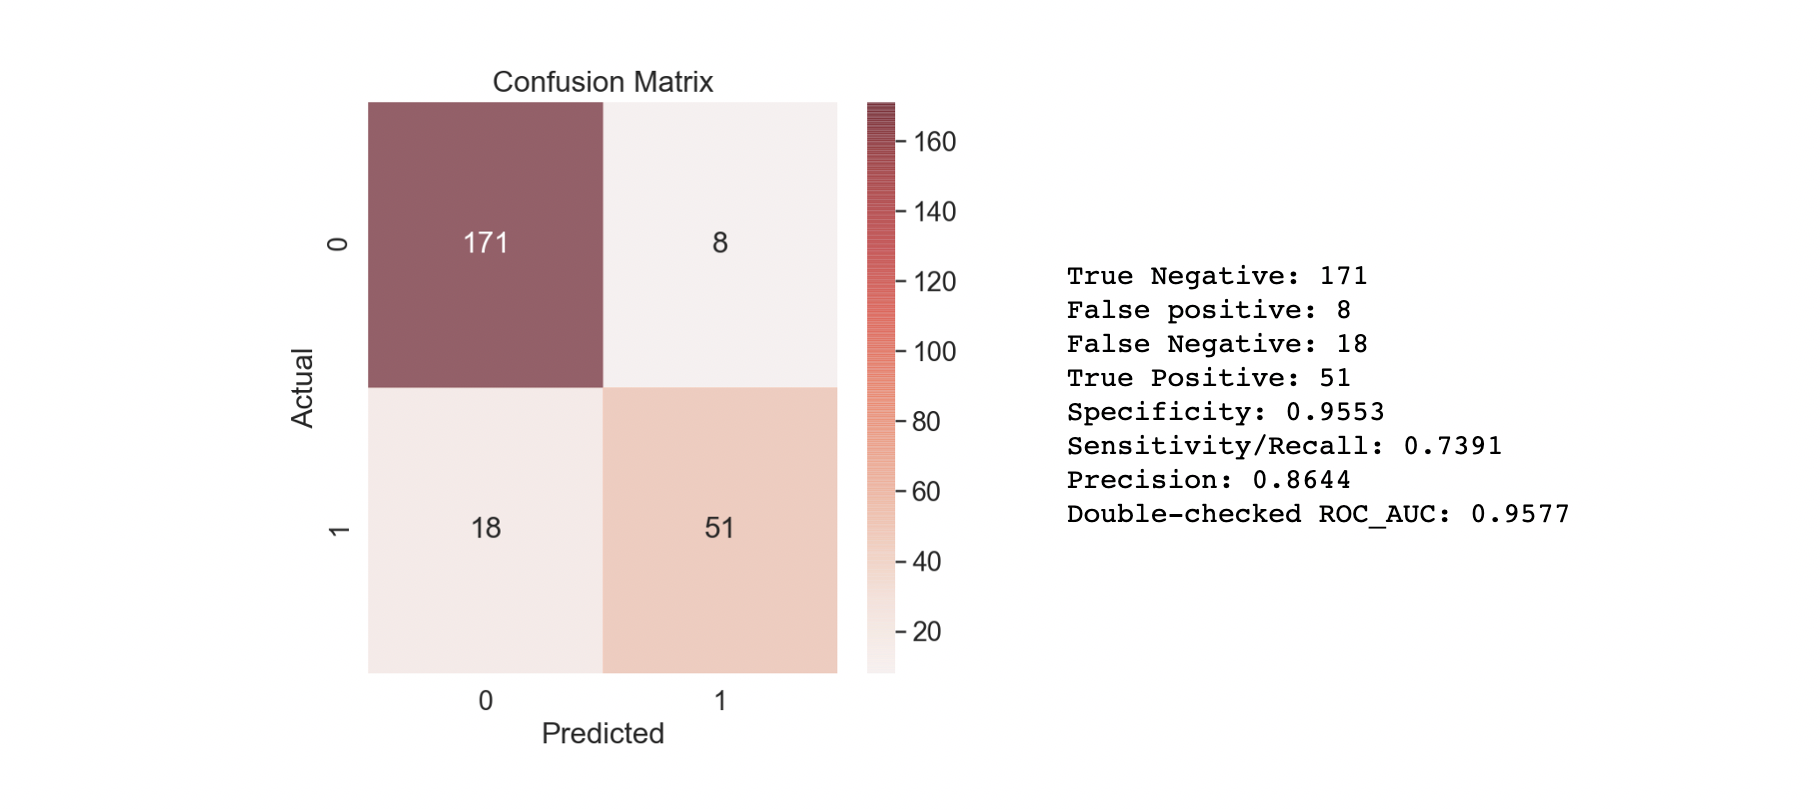


The Confusion Maxtrix will help describe the performance of the model using real counts for easier understanding. 

In the Matrix Representation above we can see:<br>
True Negative: 171<br>
False positive: 8<br>
False Negative: 18<br>
True Positive: 51<br>

What this tells us is ... in a prediction set of 248, our classifier made 171 correct guesses for Horror (Negatives = not Sci-fi) and 51 correct guesses for Sci-fi (Positives = Sci-fi). 

Together, it has <b>predicted 222 out of 248 correctly</b>, an improvement from the 220/248 that the initial model had predicted.  We also see an <b>improvement with the reduction of Type II errors</b> in the final model (Initial Model - False Negative: 22 vs Final Model - False Negative: 18) 


-----

- Back to: [4.0 Reddit Classification Report](#4.0-Reddit-Classification-Report)

***

## 4.3 Conclusion and Recommendations


As a exploratory study into whether IMDB should invest in an upgrade, a team of Data Engineers are tasked to see if it is possible to accurately identify a movie genre based on the movie plot.

In order to answer our problem statement, we have:

1. Taken raw data from two subreddits /r/scifimovies and /r/HorrorMovies
2. Built a function with a sleeper to retrieve data from Reddit's API
3. Cleaned and explored our data
4. Further processed our data by normalizing using varous techniques.
5. Split the data into test and training sets
6. Tested different variations of our models to get the highest scoring model
7. Fitted and optimized the final model to achieve a ROC_AUC score of 0.9577



Although our final score did not beat the score of the intial model, the optimized model has manage to minimise overfitting by scoring better than its best score. This means given unseen data on Horror and Sci-fi, our model will be able to perform well. 

In the case for IMDB, this exploratory study has been successful for these two genres and should continue to expand to more genres to see if machine learning is capable of handling and differentiating accurately between more classes. If done well, this will benefit not just IMDB's source credibility, it will also improve the UX of the site and could possibly branch into improving other types of content in the site.

As data on reddit forums does seem quite limited on movie information, it is advisable to look for other soures of data (e.g rotten tomatoes, IMDB's own database) to harness potentially better data for more accurate predictions.

-----

- Back to: [4.0 Reddit Classification Report](#4.0-Reddit-Classification-Report)


Jump to:
- [1.0 Data Collection and Cleaning](01_data_collection_&_cleaning.ipynb)
- [2.0 EDA & Data Preprocessing](02_eda_&_data_processing.ipynb)
- [3.0 Model Building](03_model_building.ipynb)
<!-- - [4.0 Reddit Classification Report](04_reddit_classification_report.ipynb) -->